# VIDEO LINK - https://www.youtube.com/watch?v=KyLv70t-uuo

# Table of Contents
1. [Introduction](#introduction)
2. [Structure](#structure)
3. [Imports](#imports)
4. [Data Description](#data-description)
5. [SMOTE](#SMOTE)
6. [Data Preprocessing](#data-preprocessing)
    1. [Differences in the scale of features](##differences-in-the-scale-of-features)
    2. [Income representation](##income-representation)
    3. [Education representation](##education-representation)
    4. [Age representation](##age-representation)
    5. [Final look at the data](##final-look-at-the-data)
    6. [Comments on Milestone 3](##comments-on-milestone-3)
7. [EDA](#eda)
    1. [Best Predictors for Diabetes](#best-predictors-for-diabetes)
8. [Base Modeling](##base-modeling)
    1. [KNN](##knn)
    2. [Logistic Regression](##logistic-regression)
    3. [Decision Tree](##decision-tree)
    4. [Note on Colinearity](##note-on-colinearity)
    5. [Summary](##summary)
9. [Milestone 4](#milestone-4)
    1. [Random Forest](##random-forest)
    2. [ADA Boosting](##ada-boosting)
    3. [ADA and PCA](##ada-and-pca)
9. [Final Remarks](#final-remarks)


The code relies on several key Python libraries: **pandas** for data manipulation and analysis, **numpy** for numerical computations, **matplotlib** and **seaborn** for creating visualizations, **scikit-learn** for machine learning algorithms and preprocessing, and **imblearn** for handling imbalanced datasets with techniques like SMOTE. These libraries are essential for processing data, training models, evaluating results, and visualizing outcomes.

This notebook uses a Python 3.12.6 kernel. If your kernel does not support the required dependencies, you can resolve this by creating a new Python virtual environment and installing the necessary packages. To do this, go to the **Kernel** menu in your Jupyter Notebook, select **Change Kernel**, and choose **Create New Environment** (e.g., Python venv). Once the new environment is created, you can install the dependencies using a `requirements.txt` file. Simply click on the `requirements.txt` option to automatically install all the libraries listed in it. This approach ensures the environment is fully configured to run the code, avoids compatibility issues, and supports reproducibility.

# Introduction

Diabetes is a chronic medical condition characterized by high levels of glucose in the blood. It is a major health concern worldwide, affecting millions of people. There are primarily two types of diabetes: Type 1 and Type 2. Type 1 diabetes is an autoimmune condition where the body attacks insulin-producing cells, while Type 2 diabetes is characterized by insulin resistance and is often associated with lifestyle factors. Our dataset has a different approach to providing an indicators for different onsets of diabetes: 
<span style="color: red;">**0 for no diabetes or diabetes only during the pregnancy, 1 for the prediabetes, 2 for having diabetes of either type 1 or type 2 (no differentiation between them).** Thus, the problem we are trying to solve is a multiclass classification problem.

<span style="color: red;">**The goal of this project is to predict the onset of diabetes based on the patient's answers to a survey where the answer can act as a self-check on the likelihood of having diabetes.**</span>


For the purposes of milestone 2 and 3, we will explore the dataset of about 250k patient answers to survays to understand the factors that contribute to the onset of diabetes. The data is taken from BRFSS survay conducted yearly on the american population. The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984.

The meaning of the columns in the dataset will be explained in the next section, but for reference here is the document explaining all the columns in the survay, only 22 of which we use: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
We will use various models to predict the onset of diabetes based on the patient's answers to the survey questions. 
We will also explore the dataset to identify trends and patterns that may be useful in understanding the risk factors for diabetes.

# Structure
The code is organized into well-defined sections for clarity and ease of navigation, as outlined in the Table of Contents. It begins with an Introduction, followed by necessary Imports and loading of the dataset. After a comprehensive Data Description, the Data Preprocessing section addresses missing values, class imbalance, feature engineering, and scaling. Exploratory Data Analysis (EDA) includes specific analyses such as distributions, correlations, and heatmaps to understand relationships within the data. The Modeling section implements and evaluates several machine learning models like KNN, Logistic Regression, and Random Forest. Finally, Dimensionality Reduction, Next Steps, and Final Remarks summarize outcomes and propose future work. 

# Imports

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('data/diabetes_predictors/diabetes_indicators.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Description

This dataset contains 22 predictors, capturing a wide range of health, lifestyle, and demographic indicators. Most of these predictors are categorical or binary variables, such as **Smoker** (indicating if the individual smokes), **HighBP** (presence of high blood pressure), and **HeartDiseaseorAttack** (indicating a history of heart disease or heart attack). Some variables, like **Sex** and **Age**, are also categorical but represent demographic information.

One notable continuous variable is **BMI** (Body Mass Index), which could either be analyzed as is or transformed into categories (e.g., "Underweight," "Normal," "Overweight," and "Obese") based on widely accepted benchmarks. This transformation would allow for a more interpretable understanding of how different BMI ranges correlate with health outcomes. However, given that we explored that option and found that a lot of information was being lost, we will keep the BMI continuous but scaled. 

In addition to health indicators, several other variables assess general well-being or access to care, such as **GenHlth** (general health), **MentHlth** (mental health), **PhysHlth** (physical health), **Education**, and **Income**. These variables are numerical, often representing different levels or frequencies, and could be grouped into broader categories like “low,” “moderate,” or “high,” which may simplify analysis and enhance interpretability. Other than simplification of categories, they too will be one-hot encoded.

Overall, this dataset combines categorical, binary, and continuous data so we have a rich foundation for statistical analysis and predictive modeling. By examining the relationships between these predictors and the final outcome like **Diabetes_012**, we can derive connections and a deep understanding of the risk factors and associations between lifestyle, demographic factors, and health conditions.

## Examining the dataset for missing values
Examining the dataset, none of the values are missing which is great since we can continue on with further analysis.

In [3]:
# Show how many missing entries are in each column
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# SMOTE
To handle class imbalance in **Diabetes_012**, we’ll use **SMOTE** to create extra examples for the minority class (diabetes cases). This will help balance the dataset without losing any data, improving the model's ability to identify patterns in diabetes cases. We will use it after doing the train-test split since we want to prevent the model from 'seeing' the data.

However, SMOTE’s effectiveness, through trial and testing showed that it heavily depends on the model and doesn't improve the models we have chosen to test.
- **KNN**: SMOTE should be highly useful since KNN relies on feature space proximity, and a balanced dataset ensures better representation for the minority class. 
- **Logistic Regression**: Adding synthetic data can help reduce imbalance and improve decision boundaries, so that makes SMOTE valuable here.  
- **Decision Trees and Ensemble Methods (e.g., Random Forests with AdaBoost)**: These models already handle class imbalance using built-in techniques like class weighting and focusing on misclassified samples. SMOTE will not be necessary and could lead to overfitting in these cases.

SMOTE is a great fit for KNN and logistic regression, so we will try it in the later segments of the code and see whether our understanding is correct. As we will see, it’s less beneficial for decision trees and ensemble methods, which are inherently robust to imbalance.

In [4]:
# Balancing the classes
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


**What does SMOTE do?** 
SMOTE stands for Synthetic Minority Over-sampling Technique. It is used in machine learning to address the issue of imbalanced datasets, where one class has significantly fewer samples than the other(s). SMOTE identifies the minority class in your dataset, which is the class with fewer samples. Instead of simply duplicating the existing samples of the minority class, SMOTE generates new synthetic samples. It does this by selecting two or more similar instances from the minority class and creating new instances that are combinations of these instances. By adding these synthetic samples to the minority class, SMOTE helps balance the dataset, making the number of samples in each class more equal.

In [5]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [6]:
pd.set_option('display.max_columns', 100)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [60]:
num_rows = X.shape[0]
num_rows

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_smote.shape

(641109, 48)

# Data Preprocessing

## Differences in the scale of features
For our dataset, we need to address the varying scales and types of features, such as **BMI**, health scores, **Education**, and **Income**. **BMI** is a continuous variable that could either be standardized or transformed into categories (e.g., 0: underweight, 1: normal, 2: overweight, 3: obese) to improve interpretability. **Education** and **Income** represent categorical levels, so encoding them with ordinal or one-hot encoding would be suitable, depending on model requirements. Health scores like **GenHlth**, **MentHlth**, and **PhysHlth** are numeric but may benefit from either standardization to bringing them to a common scale or grouping into broader categories (e.g., low, moderate, high) for simpler analysis. This pre-processing will ensure each feature is represented appropriately and fairly in the model.


<span style="color: red;">**In the case of doing the above for BMI, making the continuous values categorical would be ineffective. We can just make changes to make this into a scalar range that matches the 0 , 1 range. We can do this by using the MinMaxScaler**

In [8]:
scaler = MinMaxScaler()
X['BMI'] = scaler.fit_transform(X[['BMI']])
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Income representation
1 - Less than $10,000  
2 - $10,000 to less than $15,000  
3 - $15,000 to less than $20,000  
4 - $20,000 to less than $25,000  
5 - $25,000 to less than $35,000  
6 - $35,000 to less than $50,000  
7 - $50,000 to less than $75,000  
8 - $75,000 or more

The **Income distribution** chart shows that higher income levels (particularly category 8, $75,000 or more) are much more represented than lower-income levels, creating a right-skewed distribution. This imbalance could cause a predictive model to perform better for higher-income individuals while being less accurate for lower-income groups, so that is going to produce some potential bias. To address this, we could use resampling techniques like oversampling lower-income categories or undersampling higher-income categories to balance the income levels. Alternatively, we could combine some of the lower-income categories to form broader groups, reducing the impact of this skew. 

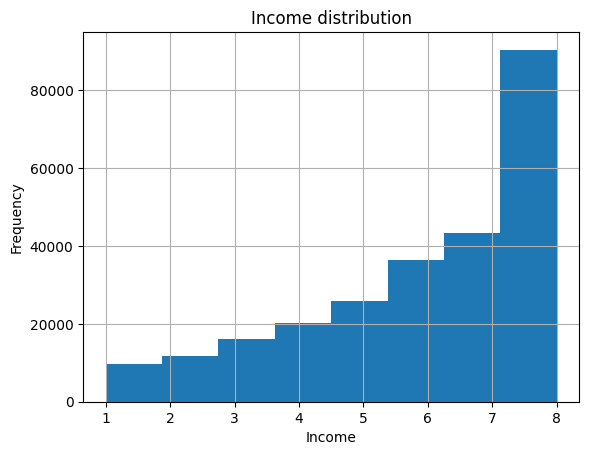

In [9]:
X['Income'].hist(bins=8)
plt.title('Income distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [10]:
bins = [0, 3, 7, float('inf')]  # The range boundaries: 0-30k, 30k-70k, 70k+ matching 3 categories
labels = ['Low-income', 'Mid-income', 'High-income']  

X['Income_group'] = pd.cut(X['Income'], bins=bins, labels=labels, right=True)
X = pd.get_dummies(X, columns=['Income_group'], prefix='Income')
X_int = X.drop(columns=['BMI']).astype(int)
X = X.drop(columns=['Income'])

X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income_Low-income,Income_Mid-income,Income_High-income
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,True,False,False
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,True,False,False
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,False,False,True
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,False,True,False
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,False,True,False


## Education representation

1 - Never attended school or only kindergarten  
2 - Grades 1 through 8 (Elementary)  
3 - Grades 9 through 11 (Some high school)  
4 - Grade 12 or GED (High school graduate)  
5 - College 1 to 3 years (Some college or technical school)  
6 - College 4 years or more (College graduate)

This **Education** distribution shows an imbalance, with certain levels being much more represented than lower education levels. This imbalance could introduce bias in a predictive model, making it more tailored to patterns seen in highly educated individuals and potentially reducing accuracy for those with lower education levels. To address this, we could consider resampling techniques to balance the representation of each education level or adjust class weights in certain models. Additionally, since some classes are much less represented we can combine 1 - 3 into 1 category less than highschool or incomplete high school.

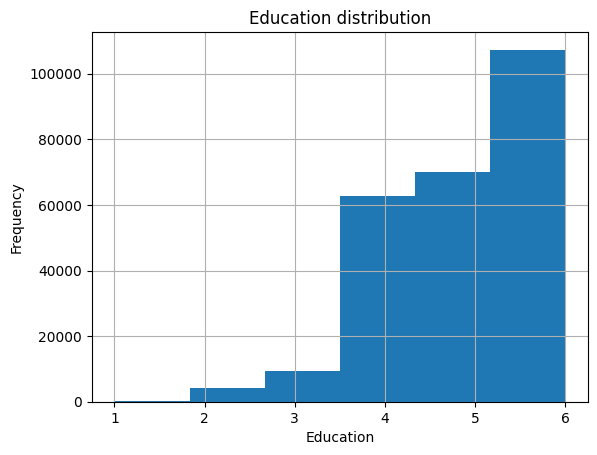

In [11]:
# Checking the skewness of the data and the distribution of education
df['Education'].hist(bins=6)
plt.title('Education distribution')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Combine categories 1, 2, and 3 into one category for both X
X['Education'] = X['Education'].replace([1, 2, 3], 1)
X['Education'] = X['Education'].replace(4, 2)
X['Education'] = X['Education'].replace(5, 3)
X['Education'] = X['Education'].replace(6, 4)

In [13]:
# One-hot encode the 'Education' column for both X
education_dummies = pd.get_dummies(X['Education'], prefix='Education').astype(int)
X = pd.concat([X.drop(columns=['Education']), education_dummies], axis=1)

In [14]:
# Convert all columns to integers except 'BMI' for both X
float_columns = ['BMI']

X[float_columns] = X[float_columns].astype(float)
X[X.columns.difference(float_columns)] = X[X.columns.difference(float_columns)].astype(int)

# Show all columns
pd.set_option('display.max_columns', None)

In [15]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income_Low-income,Income_Mid-income,Income_High-income,Education_1.0,Education_2.0,Education_3.0,Education_4.0
0,1,1,1,0.325581,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,1,0,0,0,1,0,0
1,0,0,0,0.151163,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,1,0,0,0,0,0,1
2,1,1,1,0.186047,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,0,0,1,0,1,0,0
3,1,0,1,0.174419,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,0,1,0,1,0,0,0
4,1,1,1,0.139535,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,0,1,0,0,0,1,0


## Age representation

1 - Age 18 to 24  
2 - Age 25 to 29  
3 - Age 30 to 34  
4 - Age 35 to 39  
5 - Age 40 to 44  
6 - Age 45 to 49  
7 - Age 50 to 54  
8 - Age 55 to 59  
9 - Age 60 to 64  
10 - Age 65 to 69  
11 - Age 70 to 74  
12 - Age 75 to 79  
13 - Age 80 or older

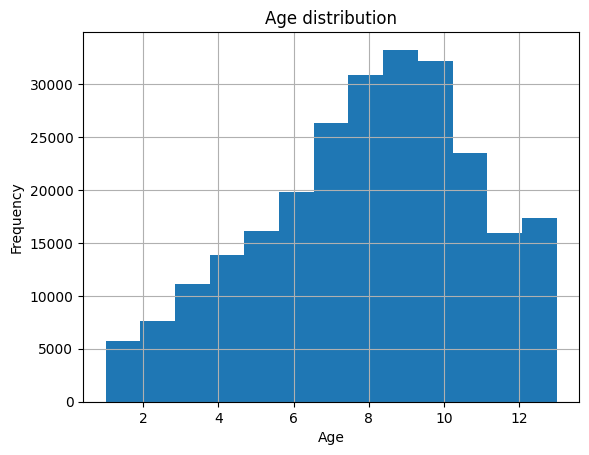

In [16]:
# check the distribution of ages across the dataset
X['Age'].hist(bins=13)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Perform one-hot encoding for the 'Age' column
age_dummies = pd.get_dummies(X['Age'], prefix='Age').astype(int)
X = pd.concat([X.drop(columns=['Age']), age_dummies], axis=1)

X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Income_Low-income,Income_Mid-income,Income_High-income,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13
0,1,1,1,0.325581,1,0,0,0,0,1,0,1,0,5,18,15,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0.151163,1,0,0,1,0,0,0,0,1,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0.186047,0,0,0,0,1,0,0,1,1,5,30,30,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0.174419,0,0,0,1,1,1,0,1,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,1,0.139535,0,0,0,1,1,1,0,1,0,2,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0



The distribution is left skewed so some categories are more represented than others. The age distribution in our dataset is left-skewed, meaning younger age groups are underrepresented compared to older ones. This skew could lead to the model being less accurate for younger age predictions, as fewer samples might make it harder to learn patterns specific to these age groups. To address this, we could apply resampling techniques to balance the distribution or use stratified sampling to ensure each age group is well-represented in both training and testing sets. However, given the dataset's large size (250,000 rows), even the smaller age groups likely have sufficient data to support learning, reducing the risk of model bias. Therefore, while the skew is present, the high volume of data should largely mitigate its potential impact, allowing the model to perform effectively across all age groups.

## Health Status
The **GenHlth** (General Health) score is represented by five categories indicating self-reported health status:

1 - Excellent  
2 - Very Good  
3 - Good  
4 - Fair  
5 - Poor  

Each category reflects a subjective assessment of overall health, with higher scores indicating poorer health. This ordinal scale allows us to capture a range of health perceptions from "Excellent" to "Poor," which may correlate with other health indicators in the dataset.

**MentHlth** represents the number of days in the past 30 days when a respondent’s mental health was "not good," including experiences of stress, depression, and emotional problems. This numeric variable ranges from 0 to 30, providing an indicator of mental health challenges over the past month.

**PhysHlth** represents the number of days in the past 30 days when a respondent’s physical health was "not good," including experiences of physical illness and injury. This numeric variable ranges from 0 to 30, providing an indicator of physical health challenges over the past month.


After scaling **MentHlth** and **PhysHlth** to a 0–1 range:

- **0** means no days of poor health.
- **1** represents the maximum (30 days) of poor health.
- Values between 0 and 1 indicate proportional days of poor health (e.g., 0.5 means 15 days). 

This makes these features comparable across different scales.

In [18]:
# Perform one-hot encoding for the 'GenHlth' column
genhlth_dummies = pd.get_dummies(X['GenHlth'], prefix='GenHlth').astype(int)
X = pd.concat([X.drop(columns=['GenHlth']), genhlth_dummies], axis=1)

X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex,Income_Low-income,Income_Mid-income,Income_High-income,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5
0,1,1,1,0.325581,1,0,0,0,0,1,0,1,0,18,15,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0.151163,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0.186047,0,0,0,0,1,0,0,1,1,30,30,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,0,1,0.174419,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,1,1,0.139535,0,0,0,1,1,1,0,1,0,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


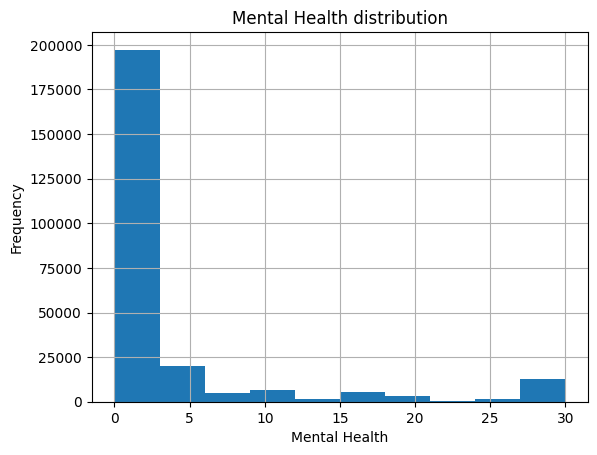

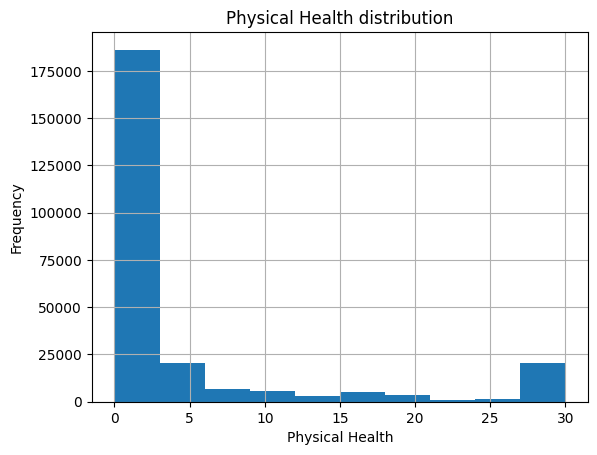

In [19]:
# Display the distribution of the 'MentHlth' feature
X['MentHlth'].hist(bins=10)
plt.title('Mental Health distribution')
plt.xlabel('Mental Health')
plt.ylabel('Frequency')
plt.show()

# Display the distribution of the 'PhysHlth' feature
X['PhysHlth'].hist(bins=10)
plt.title('Physical Health distribution')
plt.xlabel('Physical Health')
plt.ylabel('Frequency')
plt.show()

The **Mental Health** and **Physical Health** distributions are highly imbalanced, with the majority of respondents reporting very few or no days of poor health (values near 0 on the normalized scale). This imbalance could impact a model's ability to learn patterns for individuals with more frequent poor health days, as they are underrepresented in the data. 

To address this imbalance, we could group the days into broader categories to reduce imbalance while capturing meaningful variations.

In [20]:
def bin_health_days(days):
    if days == 0:
        return 0  # None
    elif 1 <= days <= 5:
        return 1  # Few
    elif 6 <= days <= 15:
        return 2  # Moderate
    else:
        return 3  # Many

# Apply the binning function to both MentHlth and PhysHlth
X['MentHlth_binned'] = X['MentHlth'].apply(bin_health_days)
X['PhysHlth_binned'] = X['PhysHlth'].apply(bin_health_days)

# Convert the binned columns to categorical data types
categories = [0, 1, 2, 3]
X['MentHlth_binned'] = pd.Categorical(X['MentHlth_binned'], categories=categories, ordered=True)
X['PhysHlth_binned'] = pd.Categorical(X['PhysHlth_binned'], categories=categories, ordered=True)

# drop the original columns
X = X.drop(columns=['MentHlth', 'PhysHlth'])

X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Income_Low-income,Income_Mid-income,Income_High-income,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,MentHlth_binned,PhysHlth_binned
0,1,1,1,0.325581,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,2
1,0,0,0,0.151163,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,1,1,0.186047,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,3
3,1,0,1,0.174419,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,1,1,0.139535,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [21]:
# Perform one-hot encoding for the binned columns
menthlth_dummies = pd.get_dummies(X['MentHlth_binned'], prefix='MentHlth').astype(int)
phys_hlth_dummies = pd.get_dummies(X['PhysHlth_binned'], prefix='PhysHlth').astype(int)

# Drop the original binned columns and concatenate the dummies
X = pd.concat([X.drop(columns=['MentHlth_binned', 'PhysHlth_binned']), menthlth_dummies, phys_hlth_dummies], axis=1)

# Display the resulting DataFrame
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Income_Low-income,Income_Mid-income,Income_High-income,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,MentHlth_0,MentHlth_1,MentHlth_2,MentHlth_3,PhysHlth_0,PhysHlth_1,PhysHlth_2,PhysHlth_3
0,1,1,1,0.325581,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0.151163,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,1,1,1,0.186047,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0.174419,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,1,1,1,0.139535,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


# Final look at the data


In [22]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Income_Low-income,Income_Mid-income,Income_High-income,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,MentHlth_0,MentHlth_1,MentHlth_2,MentHlth_3,PhysHlth_0,PhysHlth_1,PhysHlth_2,PhysHlth_3
0,1,1,1,0.325581,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0.151163,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,1,1,1,0.186047,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0.174419,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,1,1,1,0.139535,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


## Comments on Milestone 3 ## 

### Data Description

This project leverages data from the **Behavioral Risk Factor Surveillance System (BRFSS)**, a large-scale health-related telephone survey conducted annually by the CDC. The BRFSS collects responses from over 400,000 Americans on topics including health-related behaviors, chronic health conditions, and the use of preventive services. Our dataset, derived from this survey, contains responses from around 250,000 individuals and focuses on 22 selected features relevant to diabetes prediction. The BRFSS has been conducted every year since 1984, providing a reliable and comprehensive source for health-related research.

The target variable in this dataset indicates diabetes onset, with three categories: 
- **0** for no diabetes (or gestational diabetes only), 
- **1** for prediabetes, and 
- **2** for diabetes (either Type 1 or Type 2, without differentiation). 
Our objective is to predict these outcomes based on patient responses to survey questions, identifying potential risk factors for diabetes onset.
The solution to predicting this will be by using multiclass classification.

#### Data Collection Process
The data was collected via telephone surveys, with questions covering various aspects of health, lifestyle, and demographics. For this project, only 22 columns were selected out of the full survey, focusing on attributes most likely to influence or indicate diabetes risk.

#### Data Preprocessing
Data preprocessing included several steps to prepare the dataset for analysis:
- **Class Imbalance Adjustment**: We used techniques like SMOTE to address class imbalance, especially since categories 1 (prediabetes) and 2 (diabetes) were underrepresented compared to category 0.
- **Feature Engineering**: Continuous features were transformed into categories to enhance interpretability. We combined and grouped certain categories (e.g., income, education) to simplify analysis and reduce skewness. We use one hot encoding.
- **Scaling and Normalization**: Features like **BMI** were scaled down (indicating days of poor mental and physical health) were normalized on a 0-1 scale for consistency across variables.



The dataset underwent extensive cleaning, transformation, and validation to ensure readiness for analysis. We started by examining and addressing class imbalances, particularly in target variables, using techniques like SMOTE to balance underrepresented groups. Continuous features, such as **BMI**, were transformed into categories to improve interpretability, while ordinal and categorical variables, like **Income** and **Education**, were one-hot encoded or grouped into broader categories. We standardized numerical features where necessary to handle differences in scale and ensure consistency. Key health indicators, including **GenHlth**, **MentHlth**, and **PhysHlth**, represent self-reported general, mental, and physical health, respectively, with values indicating frequency or severity. The final dataset includes a mix of demographic, lifestyle, and health-related features, fully refined and ready for exploratory analysis. Visualizations such as histograms and correlation plots provide insights into feature distributions and relationships, supporting further analysis and modeling.

# EDA 

The distribution is now evenly split among the categories of No Diabetes, Prediabetes, and Diabetes. This balance is achieved through the use of SMOTE, which addresses the original imbalance by increasing the representation of diabetes cases relative to non-diabetes cases. Now we can visualize some of the other categories, features and their relation to the target variable.

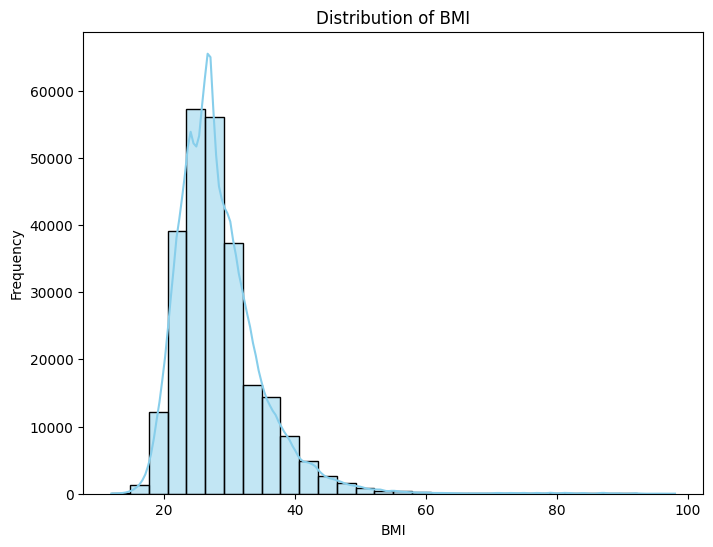

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BMI', bins=30, kde=True, color='skyblue') 
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

We see some data imbalance as there is a very low number of peoeple that fall in the underweight group which could lead to missrepresentation of this group in the final models.

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Income_Low-income', 'Income_Mid-income', 'Income_High-income',
       'Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0',
       'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8',
       'Age_9', 'Age_10', 'Age_11', 'Age_12', 'Age_13', 'GenHlth_1',
       'GenHlth_2', 'GenHlth_3', 'GenHlth_4', 'GenHlth_5', 'MentHlth_0',
       'MentHlth_1', 'MentHlth_2', 'MentHlth_3', 'PhysHlth_0', 'PhysHlth_1',
       'PhysHlth_2', 'PhysHlth_3', 'Diabetes_012'],
      dtype='object')


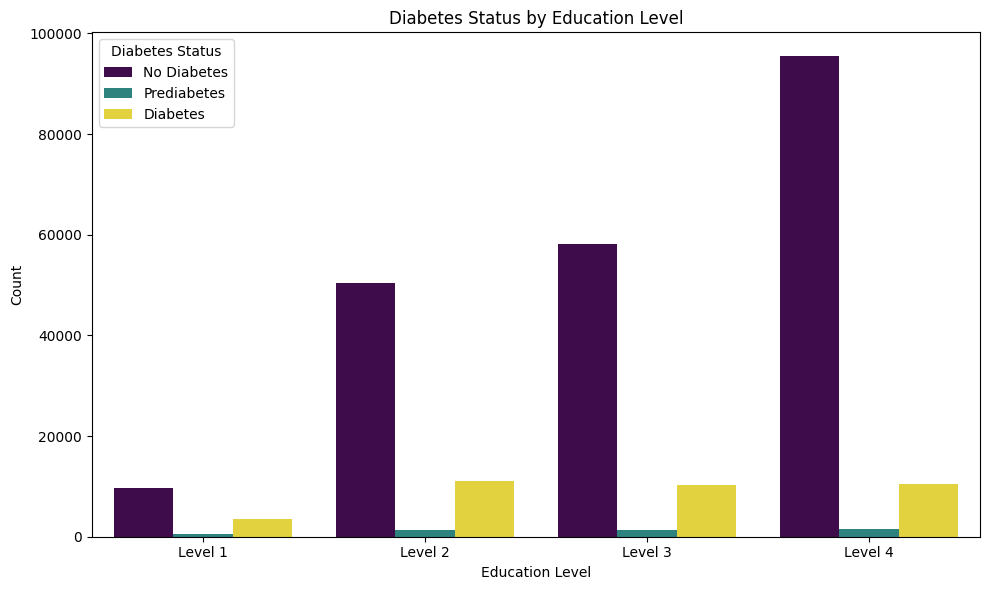

In [24]:
df = pd.concat([X, y], axis=1)

print(df.columns)

education_columns = ['Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0']
df_melted = df.melt(id_vars=['Diabetes_012'], value_vars=education_columns, 
                    var_name='Education', value_name='Count')


df_melted = df_melted[df_melted['Count'] > 0]

education_labels = {
    'Education_1.0': 'Level 1',
    'Education_2.0': 'Level 2',
    'Education_3.0': 'Level 3',
    'Education_4.0': 'Level 4'
}
df_melted['Education'] = df_melted['Education'].map(education_labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted, x='Education', hue='Diabetes_012', palette='viridis')
plt.title('Diabetes Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.tight_layout()
plt.show()


The graph above shows that people with higher education levels are less likely to have diabetes. This could be because higher education often brings more knowledge about healthy habits, like eating well, staying active, and managing stress—habits that help prevent diabetes. Additionally, people with more education may have better access to healthcare and healthier food options, which can also lower their risk of developing diabetes.

Seeing this, we recognize that education level is an important feature to include in our model for explaining diabetes risk. By incorporating education as a predictor, we can improve the model’s ability to capture underlying social and lifestyle factors that contribute to diabetes outcomes.

However, an issue with education as a predictor is that possibility of a cofounding variable such as family background. A survey participant who came from a high-income family is likely to be able to efford higher education and healtcare so by only considering education as a predictor, we are likely overestimating the effect it has on our response variable.

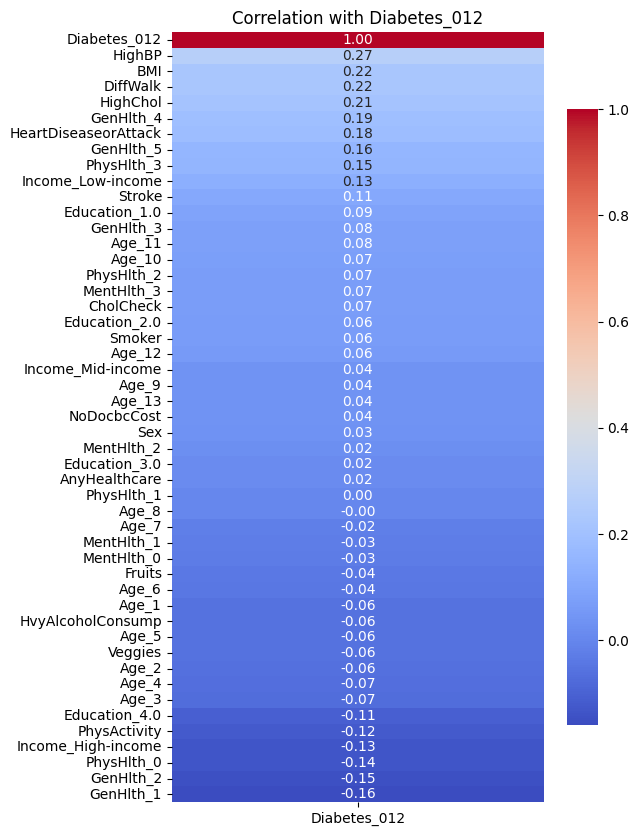

In [25]:
corr_matrix = df.corr()

diabetes_corr = corr_matrix[['Diabetes_012']].sort_values(by='Diabetes_012', ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(diabetes_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.title('Correlation with Diabetes_012')
plt.show()

## Best Predictors for Diabetes

**HighBP (0.27):**  
High blood pressure stands out as the strongest predictor of diabetes. It’s not surprising since issues like poor diet, lack of exercise, and weight gain often contribute to both conditions. This makes it an essential factor to keep an eye on when assessing diabetes risk.

**BMI (0.22):**  
Body Mass Index is another big one. Excess weight can lead to insulin resistance, making diabetes much more likely. Managing weight through diet and exercise is key to lowering this risk.

**DiffWalk (0.22):**  
Difficulty walking is strongly connected to diabetes, likely because it reflects physical inactivity or other health challenges. It’s a sign that mobility and lifestyle habits are critical in understanding who’s at risk.

**HighChol (0.21):**  
High cholesterol is also a factor, tying into unhealthy diets and sedentary lifestyles. While it’s not the strongest predictor, it’s worth considering since it often coexists with other risk factors.

**GenHealth_4 (0.19):**  
People who rate their general health as very poor are at significantly higher risk. This makes sense—poor overall health often reflects a combination of chronic issues, including diabetes.

**Heart Disease or Attack (0.18):**  
Having heart disease or a history of heart attacks is another strong indicator. The link between cardiovascular problems and diabetes is well-documented, as both share many of the same underlying causes.

**GenHealth (0.15):**  
Even slightly lower ratings of general health can indicate a higher risk. It’s a reminder that how someone feels about their overall health is often a good indicator of underlying issues.

**PhysHlth_3 (0.15):**  
Severe physical health problems are another important factor. Chronic illness often limits physical activity, which can spiral into higher diabetes risk.

**Income_LowIncome (-0.13):**  
Lower income is mildly associated with higher diabetes risk. This might be due to limited access to healthy food, regular medical care, or resources for maintaining a healthy lifestyle. It’s a reminder that socioeconomic factors matter.

### What It All Means:  
The biggest takeaways here are that physical health, weight, and mobility are key to predicting diabetes risk. HighBP, BMI, and DiffWalk stand out as the strongest predictors, but factors like cholesterol, heart disease, and general health also play important roles. Even income ties in, showing how lifestyle and access to resources can shape health outcomes. It’s a mix of physical, lifestyle, and socioeconomic influences that paint the full picture of diabetes risk.

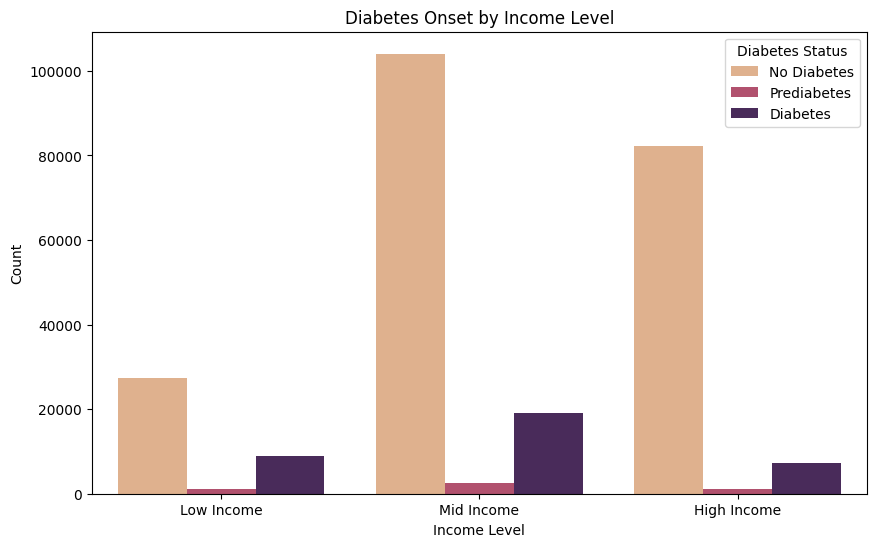

In [26]:
income_columns = ['Income_Low-income', 'Income_Mid-income', 'Income_High-income']
df_melted = df[income_columns + ['Diabetes_012']].melt(
    id_vars='Diabetes_012', 
    var_name='Income', 
    value_name='Count'
)

df_melted = df_melted[df_melted['Count'] > 0]
df_melted['Income'] = df_melted['Income'].replace({
    'Income_Low-income': 'Low Income',
    'Income_Mid-income': 'Mid Income',
    'Income_High-income': 'High Income'
})

plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted, x='Income', hue='Diabetes_012', palette='flare')
plt.title('Diabetes Onset by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


As shown in the graph above, income is strongly correlated with diabetes risk. Higher-income individuals tend to have better access to a healthy lifestyle, including options like organic food, regular healthcare, and preventive resources. This access supports healthier habits, which may reduce their likelihood of developing diabetes.

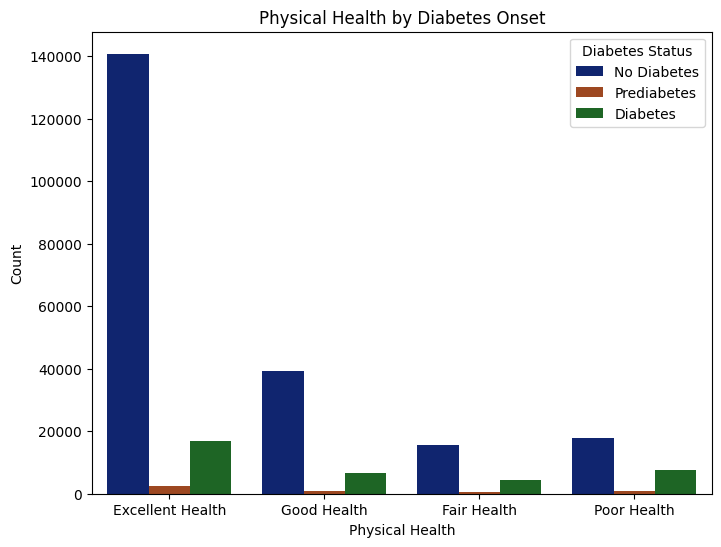

In [27]:
phys_health_columns = ['PhysHlth_0', 'PhysHlth_1', 'PhysHlth_2', 'PhysHlth_3']
df_melted = df[phys_health_columns + ['Diabetes_012']].melt(
    id_vars='Diabetes_012', 
    var_name='PhysHealth', 
    value_name='Count'
)

df_melted = df_melted[df_melted['Count'] > 0]
df_melted['PhysHealth'] = df_melted['PhysHealth'].replace({
    'PhysHlth_0': 'Excellent Health',
    'PhysHlth_1': 'Good Health',
    'PhysHlth_2': 'Fair Health',
    'PhysHlth_3': 'Poor Health'
})

plt.figure(figsize=(8, 6))
sns.countplot(data=df_melted, x='PhysHealth', hue='Diabetes_012', palette='dark')
plt.title('Physical Health by Diabetes Onset')
plt.xlabel('Physical Health')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

People who are more physically active are more likely to maintain good health and have a lower risk of developing diabetes. Regular physical activity helps manage weight, improves insulin sensitivity, and supports overall metabolic health, all of which are key factors in reducing diabetes risk.

As we go throuh the EDA, one might notice an issue of collinearity within the dataset, where certain features are highly correlated with each other. We’ll delve into this potential problem in more detail below in the ending of the notebook.

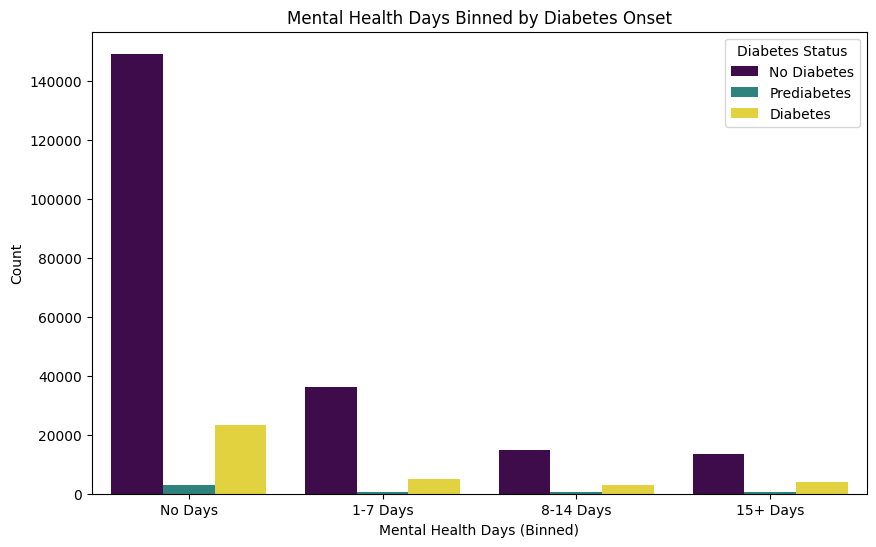

In [28]:
ment_health_columns = ['MentHlth_0', 'MentHlth_1', 'MentHlth_2', 'MentHlth_3']
df_melted = df[ment_health_columns + ['Diabetes_012']].melt(
    id_vars='Diabetes_012', 
    var_name='MentHealth', 
    value_name='Count'
)

df_melted = df_melted[df_melted['Count'] > 0]
df_melted['MentHealth'] = df_melted['MentHealth'].replace({
    'MentHlth_0': 'No Days',
    'MentHlth_1': '1-7 Days',
    'MentHlth_2': '8-14 Days',
    'MentHlth_3': '15+ Days'
})

plt.figure(figsize=(10, 6))
sns.countplot(data=df_melted, x='MentHealth', hue='Diabetes_012', palette='viridis')
plt.title('Mental Health Days Binned by Diabetes Onset')
plt.xlabel('Mental Health Days (Binned)')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

The mental health days count does not show a clear distinction across diabetes classes among the categories "many," "none," and "few." This lack of separation suggests that mental health days may not be a strong predictor of diabetes on its own. However, this is an area that should be further explored to determine if there might be subtler patterns or interactions with other features that could contribute to diabetes prediction.

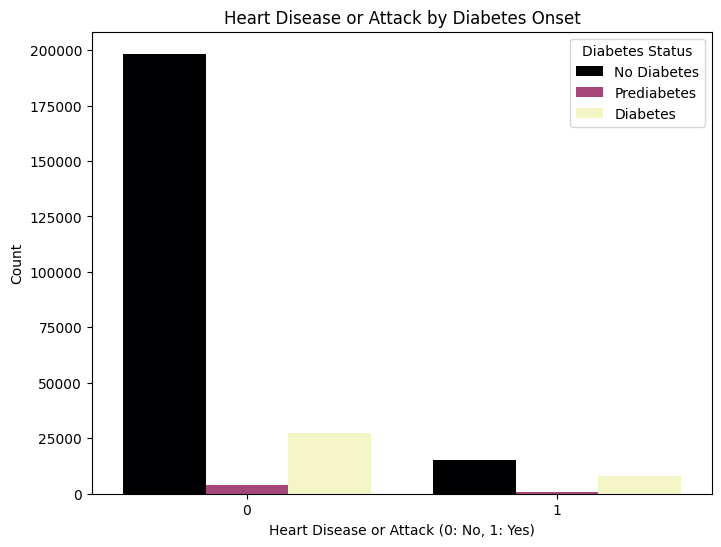

In [29]:
# Heart Disease or Attack vs Diabetes Onset
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HeartDiseaseorAttack', hue='Diabetes_012', palette='magma')
plt.title('Heart Disease or Attack by Diabetes Onset')
plt.xlabel('Heart Disease or Attack (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

As we saw in the heatmap, there seems to be a correlation between prediabetes and a history of heart attack. This relationship could be explained by the fact that individuals who have experienced a heart attack may be more motivated to improve their diet and lifestyle to prevent further health issues, potentially delaying or managing diabetes progression.

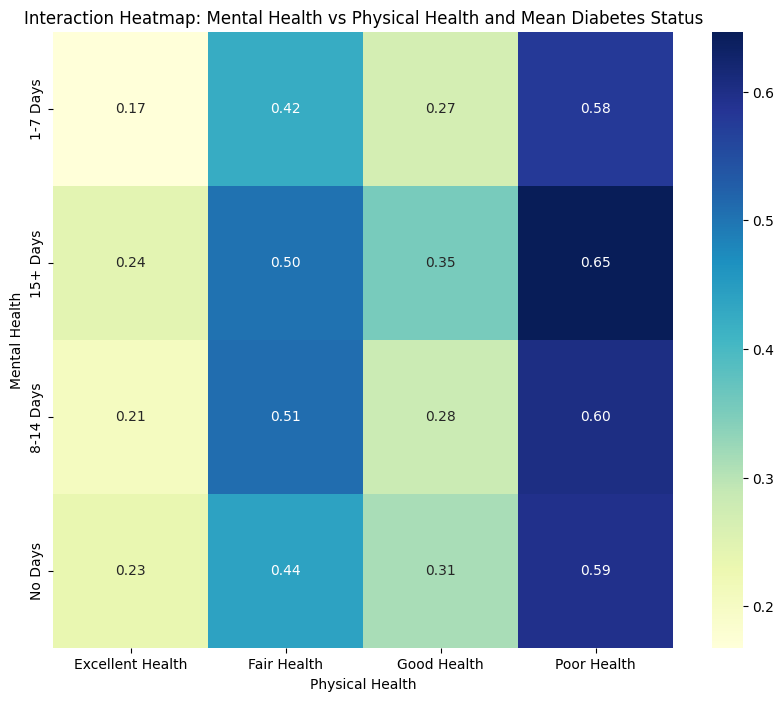

In [30]:

menthlth_groups = ['MentHlth_0', 'MentHlth_1', 'MentHlth_2', 'MentHlth_3']
df['MentHlth'] = df[menthlth_groups].idxmax(axis=1)

phys_hlth_groups = ['PhysHlth_0', 'PhysHlth_1', 'PhysHlth_2', 'PhysHlth_3']
df['PhysHlth'] = df[phys_hlth_groups].idxmax(axis=1)

df['MentHlth'] = df['MentHlth'].replace({
    'MentHlth_0': 'No Days',
    'MentHlth_1': '1-7 Days',
    'MentHlth_2': '8-14 Days',
    'MentHlth_3': '15+ Days'
})

df['PhysHlth'] = df['PhysHlth'].replace({
    'PhysHlth_0': 'Excellent Health',
    'PhysHlth_1': 'Good Health',
    'PhysHlth_2': 'Fair Health',
    'PhysHlth_3': 'Poor Health'
})

interaction_data_health = df.groupby(['MentHlth', 'PhysHlth'])['Diabetes_012'].mean().unstack().fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_data_health, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('Interaction Heatmap: Mental Health vs Physical Health and Mean Diabetes Status')
plt.xlabel('Physical Health')
plt.ylabel('Mental Health')
plt.show()


This heatmap visualizes the interaction between general health index, physical health, and mean diabetes status. We observe that as the general health index worsens (from excellent to poor), the average diabetes status increases across all categories of physical health. This trend suggests that poorer self-reported general health is strongly associated with a higher likelihood of diabetes.

Interestingly, the correlation between worsening general health and mean diabetes status intensifies further when individuals report more days of poor mental health. This indicates that poor mental health may amplify the relationship between declining general health and the likelihood of diabetes. 

# Base modeling 
Creating a base model with the majority class now is impossible specificallly for the diabetes_012 column since we equalized them because there is a class imbalance we don't want to affect our predictions. We want to strictly use predictors to learn our diabetes status. We choose knn or logistic regression as some baseline model.


In [31]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Income_Low-income,Income_Mid-income,Income_High-income,Education_1.0,Education_2.0,Education_3.0,Education_4.0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,GenHlth_1,GenHlth_2,GenHlth_3,GenHlth_4,GenHlth_5,MentHlth_0,MentHlth_1,MentHlth_2,MentHlth_3,PhysHlth_0,PhysHlth_1,PhysHlth_2,PhysHlth_3
185494,1,0,1,0.151163,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
217030,0,0,1,0.290698,1,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
641,1,1,1,0.267442,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
217863,0,0,1,0.174419,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
53677,0,0,1,0.186047,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [32]:
SMOTE = SMOTE(random_state=42)
X_train_resample, y_train_resample = SMOTE.fit_resample(X_train, y_train)

## KNN Model

Best k: 9
Best Validation Accuracy: 0.8215074109113845
Train Accuracy for Best k: 0.9886816067486597


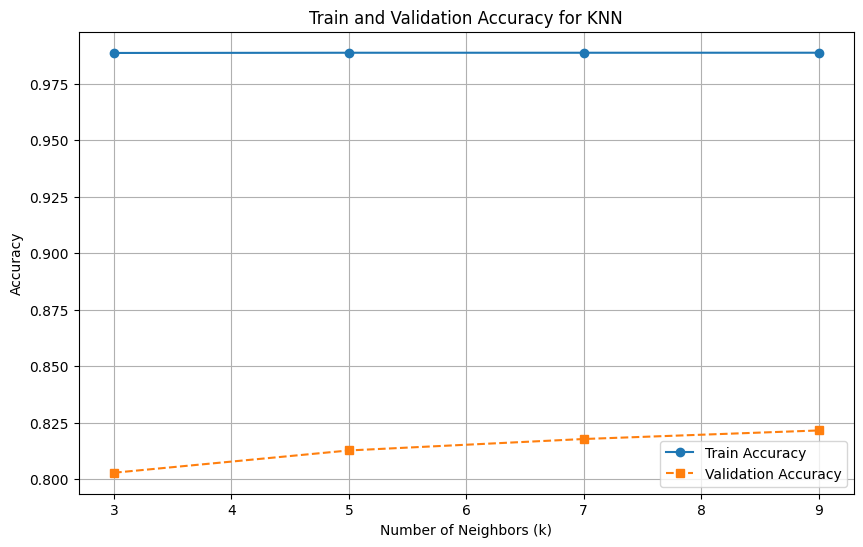

In [33]:
ks = [3, 5, 7, 9]
train_scores = []
val_scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')

    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    
    y_val_pred = knn.predict(X_test)
    val_scores.append(accuracy_score(y_test, y_val_pred))

# Find the best k
best_k = ks[val_scores.index(max(val_scores))]
best_val_score = max(val_scores)
best_train_score = train_scores[val_scores.index(max(val_scores))]

# For comparison later
best_knn = {
    'k': best_k,
    'val_score': best_val_score,
    'train_score': best_train_score
}

# Print the results
print(f"Best k: {best_k}")
print(f"Best Validation Accuracy: {best_val_score}")
print(f"Train Accuracy for Best k: {best_train_score}")

plt.figure(figsize=(10, 6))
plt.plot(ks, train_scores, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(ks, val_scores, marker='s', label='Validation Accuracy', linestyle='--')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy for KNN')
plt.legend()
plt.grid(True)
plt.show()

The model achieves an overall accuracy of 83%, meaning it correctly predicts diabetes status most of the time. We used a balanced dataset however in our exploration the model performed worse then just training it on the imbalanced train and test data. We thus decided to keep the model as is. We initially made a rookie mistake of first balancing the set and then splitting but with that in a way the model would see the data before it was tested on very similar data and would thus perform better. With the correct way of using SMOTE on the X_train and y_train directly, and then testing on the imbalanced data we get significantly worse scores(about 13 %).

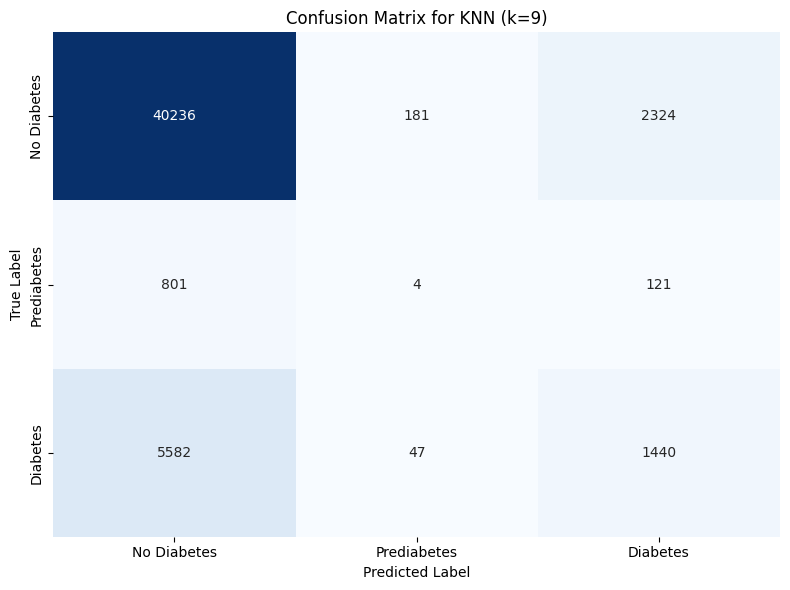

In [34]:

knn_model = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
labels = ['No Diabetes', 'Prediabetes', 'Diabetes']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for KNN (k={best_k})')
plt.tight_layout()
plt.show()

The graph above displays the number of true positives, true negatives, false positives, and false negatives. A concern is the high number of falsely predicted diabetes patients (false positives), which indicates a less-than-ideal performance in distinguishing diabetes cases. This could be attributed to the model's sensitivity toward the diabetes boundary, as it appears to prioritize better performance in predicting prediabetes and diabetes classes. This trade-off might explain the model's inclination to err on the side of false positives, favoring the identification of potential diabetes cases at the expense of precision. Additionally, we see that the model does poorly with misslassifying patients not having diabetes, and this might be due to the quality of the data, since it is a survey and people self-assess their health outcomes. 

## Logistic regression 

In [35]:
pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42))
])

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_logistic = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)

grid_search_logistic.fit(X_train, y_train)

best_logistic = grid_search_logistic.best_estimator_

y_pred_logistic = best_logistic.predict(X_test)

print("Best Logistic Regression Parameters:", grid_search_logistic.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

Best Logistic Regression Parameters: {'classifier__C': 100}
Logistic Regression Accuracy: 0.8481748659728792
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.39     50736
weighted avg       0.80      0.85      0.81     50736



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

The logistic regression model demonstrates a high overall accuracy of 84.8%, which at first glance seems impressive. However, a closer look reveals significant issues in the model's performance, particularly for minority classes. The precision, recall, and f1-score for class 1.0 (diabetes) are all 0.00, indicating that the model fails to correctly identify patients in this category, instead frequently misclassifying them as 0.0 (no diabetes).

The primary reason for this poor performance is likely the class imbalance in the dataset, with a disproportionately large number of samples in the 0.0 class. Logistic regression tends to favor the majority class during training, which results in high precision and recall for 0.0, as seen with a recall of 0.98 for this class. This skew towards the majority class also explains the high overall accuracy since the model predicts the majority class (0.0) well.

However, the macro average accuracy is significantly lower, at just 39%, reflecting the model's inability to generalize across all classes. The weighted average accuracy is somewhat higher (81%) but still fails to compensate for the model's poor performance in minority classes.

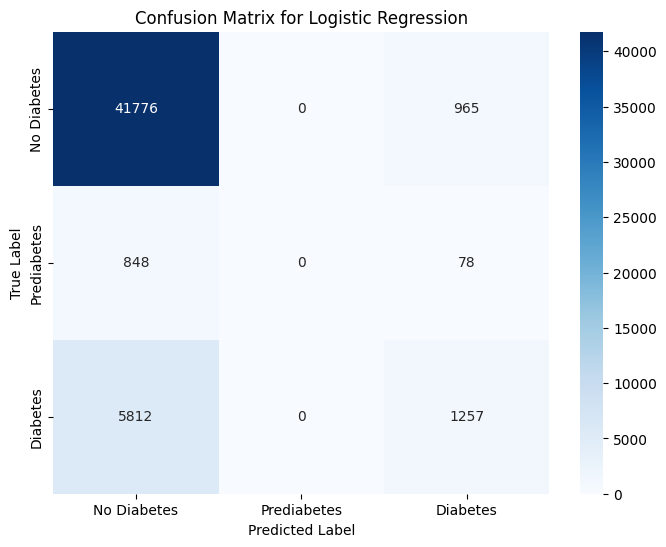

In [36]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

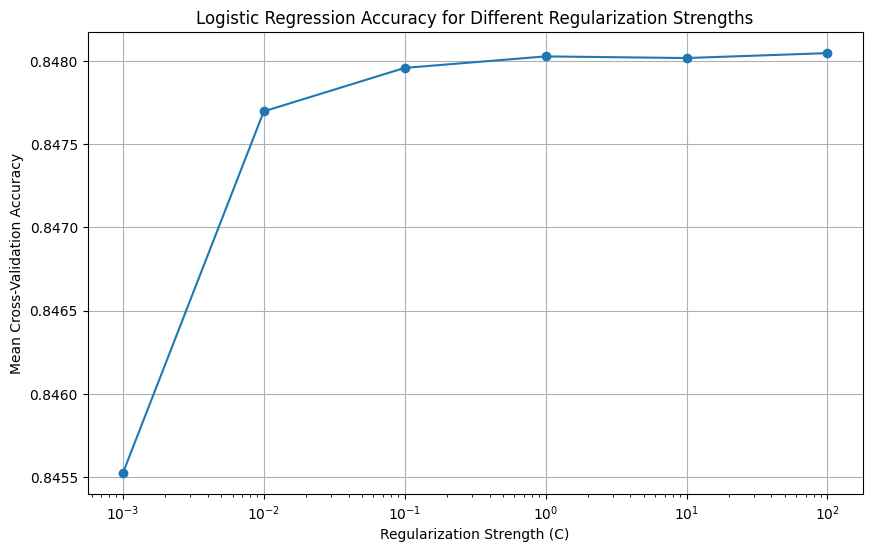

In [37]:
# Visualize the relationship between regularization strength and accuracy
cv_results = grid_search_logistic.cv_results_
accuracy_scores = cv_results['mean_test_score']
C_values = cv_results['param_classifier__C'].data

plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Logistic Regression Accuracy for Different Regularization Strengths')
plt.grid(True)
plt.show()

In [66]:
logistic_model = LogisticRegression(C=1, max_iter=10000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

accuracy_score(y_test, y_pred_logistic)
print(classification_report(y_test, y_pred_logistic))

# overall accuracy
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred_logistic)}")

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.17      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

Overall Accuracy: 0.848076316619363


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## Decision tree

In [38]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

tree = DecisionTreeClassifier(random_state=42)

grid_search_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5, 
    scoring='accuracy',
    return_train_score=True,  
    n_jobs=-1,
    verbose=1
)

grid_search_tree.fit(X_train, y_train)

best_tree = grid_search_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

print("Best Decision Tree Parameters:", grid_search_tree.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

cv_results = grid_search_tree.cv_results_
mean_train_scores = cv_results['mean_train_score'].tolist()
mean_val_scores = cv_results['mean_test_score'].tolist()
param_max_depth = [param['max_depth'] for param in cv_results['params']]

# Save all scores and parameters for future use
best_dtree = {
    'mean_train_scores': mean_train_scores,
    'mean_val_scores': mean_val_scores,
    'max_depths': param_max_depth,
    'all_params': cv_results['params']
}

depths = [param['max_depth'] for param in cv_results['params']]

Fitting 5 folds for each of 63 candidates, totalling 315 fits
Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8459082308420057
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.53      0.13      0.21      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.37      0.38     50736
weighted avg       0.80      0.85      0.80     50736



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

The decision tree model, with a best accuracy of 84.6%, performs well for the majority class (no diabetes) with high recall (0.98) and f1-score (0.92), but completely fails for class diabetes with all metrics at 0. The macro averages (recall: 0.37, f1-score: 0.38) highlight this imbalance, as the model prioritizes majority class predictions, ignoring minority classes. To improve diabetes prediction, techniques like class weighting or resampling are necessary to address the dataset's imbalance.

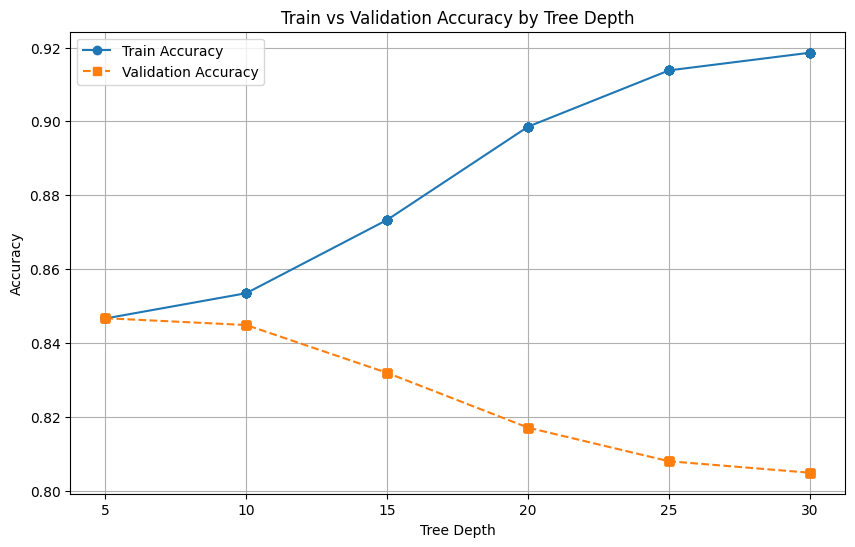

In [39]:
train_scores = [
    np.mean([mean_train_scores[i] for i, d in enumerate(param_max_depth) if d == depth]) 
    for depth in depths
]
val_scores = [
    np.mean([mean_val_scores[i] for i, d in enumerate(param_max_depth) if d == depth]) 
    for depth in depths
]


plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(depths, val_scores, marker='s', label='Validation Accuracy', linestyle='--')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy by Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

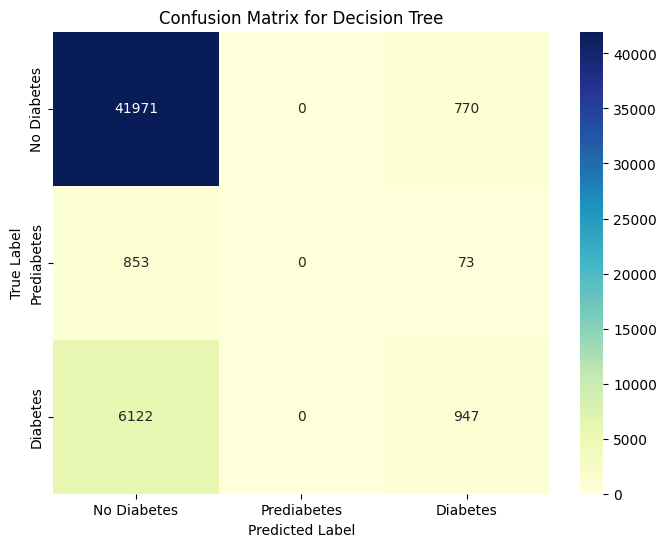

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

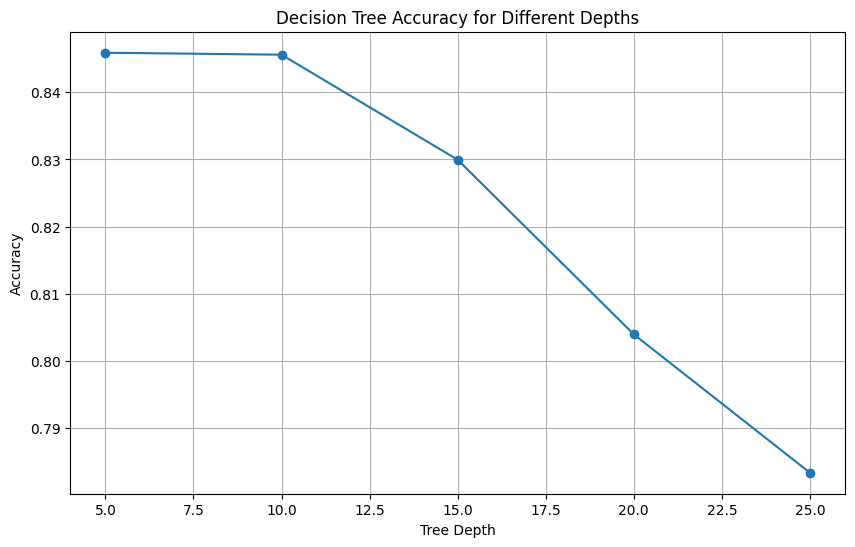

In [41]:

depths = [5, 10, 15, 20, 25]
accuracies = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-') 
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for Different Depths')
plt.grid(True)
plt.show()

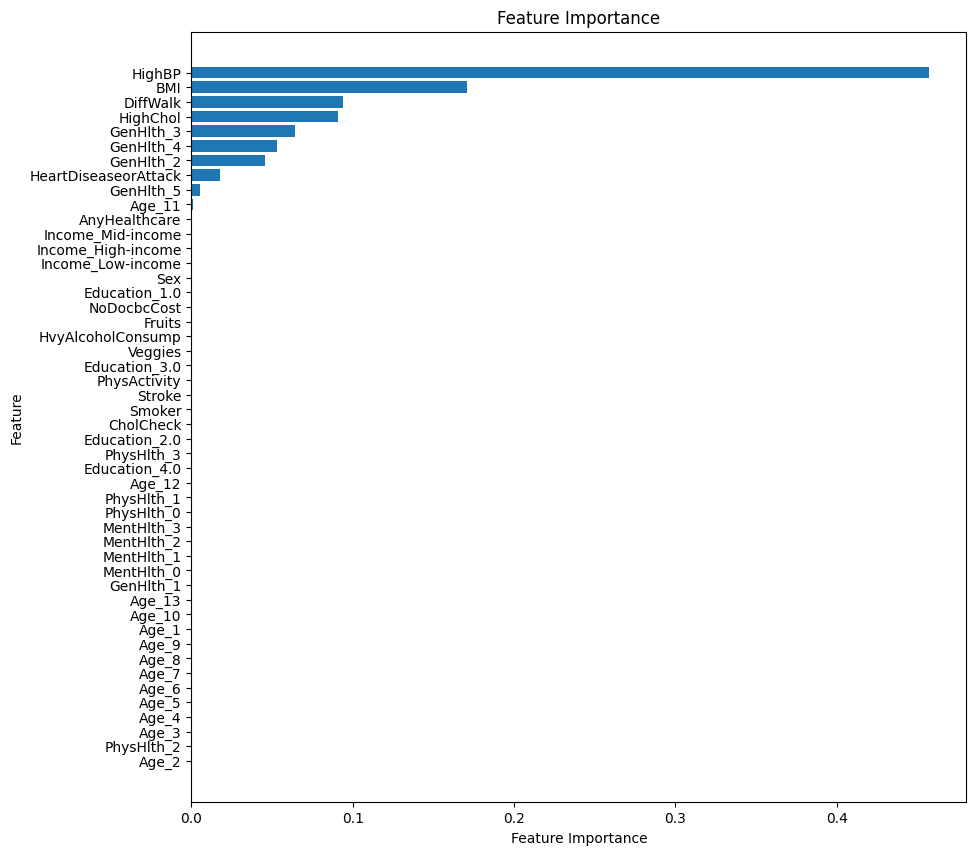

In [42]:
# feature importance
feature_importances = best_tree.feature_importances_
# order them
indices = np.argsort(feature_importances)

# plot
plt.figure(figsize=(10, 10))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.ylabel('Feature')
plt.show()

In [43]:
tree_model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    random_state=42
)

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8459082308420057
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.53      0.13      0.21      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.37      0.38     50736
weighted avg       0.80      0.85      0.80     50736



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

The decision tree analysis highlights some important aspects of the model's behavior and limitations. In the **Feature Importance** plot, we see that features like "HighBP," "BMI," and "DiffWalk" dominate, indicating that these variables strongly influence the tree's splits. This reliance on a few dominant features is common in decision trees and suggests that the model might not be utilizing all available information effectively, possibly leading to limited improvements in accuracy compared to simpler models like logistic regression.

The plot showing **Decision Tree Accuracy for Different Depths** indicates that as the tree depth increases, the accuracy initially remains stable and then starts to decline. This decline in performance at higher depths is a classic sign of overfitting—where the model captures noise and spurious patterns in the training data, reducing its ability to generalize to unseen data. The accuracy plateau at lower depths suggests that the model's performance might be fundamentally limited by the data's structure or quality, rather than the complexity of the model, which is a theme we see afterwards in other more complex models that we expect would improve accuracy but do not.

The **Confusion Matrix** further underscores the model's struggles, particularly with predicting the minority class ("Diabetes"). While the model performs well on the "No Diabetes" class due to its prevalence in the dataset, it poorly classifies instances of "Diabetes." This indicates an issue with class imbalance, as decision trees tend to favor the majority class unless specifically tuned with techniques like class weights or resampling.

Finally, the **Train vs Validation Accuracy** plot reinforces the overfitting issue. Training accuracy continues to increase with tree depth, but validation accuracy peaks early and then declines. This divergence shows that the model is fitting to training data too closely at deeper depths, failing to generalize. Compared to logistic regression, the decision tree's inability to improve significantly in accuracy may stem from the inherently linear nature of the relationships in the dataset, which logistic regression captures efficiently.

## Note on Colinearity

As we progressed through the exploratory data analysis, we identified several important relationships and features that will be used in future modeling. However, a potential challenge we need to address is collinearity among these features, as many of them—such as general health, physical health, BMI, and activity level—are strongly interrelated and ultimately reflect a person’s overall lifestyle. This overlap can complicate the model’s ability to distinguish the unique contribution of each feature, potentially explaining why the current model results, while reasonable, may be somewhat underwhelming. In the next milestone, we’ll work on strategies to address collinearity, such as dimensionality reduction or feature selection, to enhance model clarity and predictive accuracy. With these adjustments, we expect that the model’s performance will improve, making this analysis a solid foundation for building a robust diabetes prediction model.



## Summary

We have identified a few predictors with the highest correlation to diabetes as the response variable. Additionally, we have analyzied 4 models, kNN, Logistical Regression, Regular Decisions Tree and Decision Tree with Interactions and have found that the highest accuracy is achieved with a Regula Decision Tree model. Additionally, this model assures our prior findings that the most important predictors are Physical Health, Age, General Health and Income. 

Additionally, we plan to continue looking at new models such as Random Forrest Model in hopes of arriving at a higher accuracy.


# Milestone 4
Now, at this point we want to proceed with more advanced model to try to capture more information in the data and use certain features to finetune the Random Forest model. We see that the decision trees do okay, but we are sure that with random forest the varaince will be captured better and we will have created a strong model.

## Random Forest

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    rf, 
    param_grid, 
    cv=5,     
    scoring='accuracy', 
    return_train_score=True,  
    n_jobs=-1, 
    verbose=1  
)

grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Best Parameters:", grid_search_rf.best_params_)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred_rf))

cv_results = grid_search_rf.cv_results_
mean_train_scores = cv_results['mean_train_score']
mean_val_scores = cv_results['mean_test_score']
param_n_estimators = [param['n_estimators'] for param in cv_results['params']]

n_estimators_unique = sorted(set(param_n_estimators))
train_scores = [
    np.mean([mean_train_scores[i] for i, n in enumerate(param_n_estimators) if n == n_est]) 
    for n_est in n_estimators_unique
]
val_scores = [
    np.mean([mean_val_scores[i] for i, n in enumerate(param_n_estimators) if n == n_est]) 
    for n_est in n_estimators_unique
]

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.8486479028697572
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.59      0.12      0.20      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.37      0.37     50736
weighted avg       0.80      0.85      0.80     50736



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

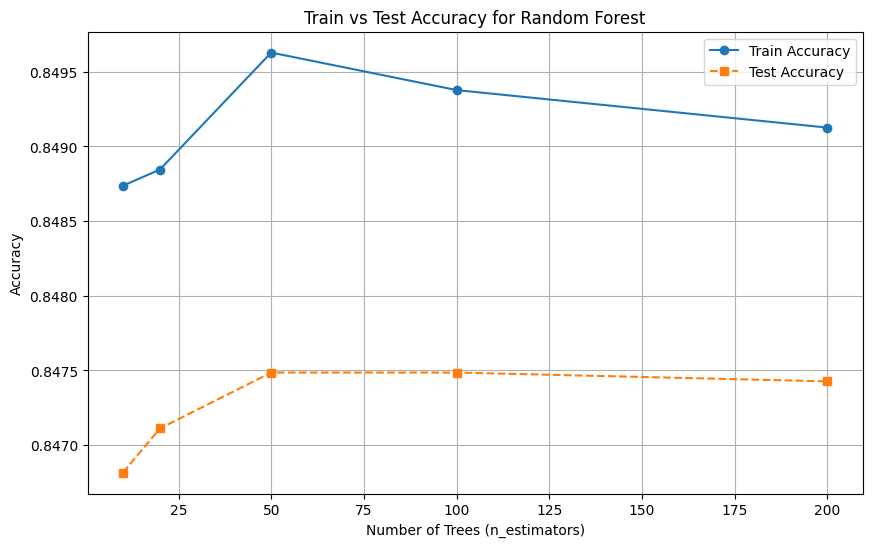

In [45]:
train_scores = []
test_scores = []
n_estimators_values = [10, 20, 50, 100, 200]

for n in n_estimators_values:
    rf_model = RandomForestClassifier(
        n_estimators=n, 
        max_depth=15, 
        min_samples_split=10, 
        min_samples_leaf=2, 
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, rf_model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, rf_model.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(n_estimators_values, test_scores, marker='s', label='Test Accuracy', linestyle='--')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Random Forest')
plt.legend()
plt.grid(True)

plt.show()

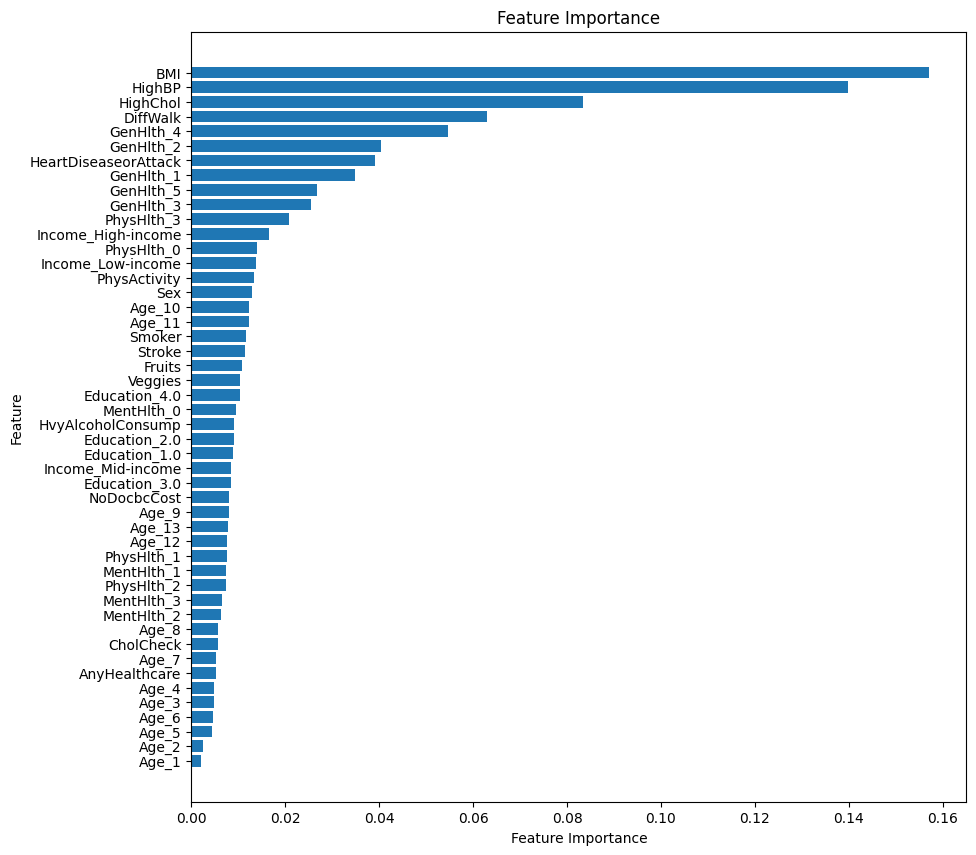

In [46]:
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.ylabel('Feature')
plt.show()


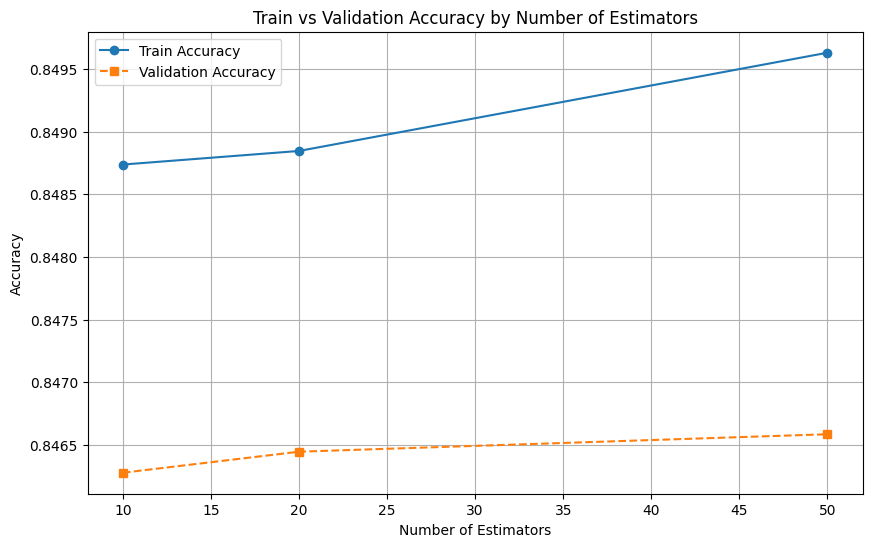

In [50]:
n_estimators_unique = n_estimators_values[:min(len(train_scores), len(val_scores))]

train_scores = train_scores[:len(n_estimators_unique)]
val_scores = val_scores[:len(n_estimators_unique)]

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_unique, train_scores, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(n_estimators_unique, val_scores, marker='s', label='Validation Accuracy', linestyle='--')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy by Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
rf_model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=15, 
    min_samples_split=10, 
    min_samples_leaf=2, 
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8486676127404604
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.60      0.12      0.19      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.37      0.37     50736
weighted avg       0.80      0.85      0.80     50736



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

The **Feature Importance** plot reveals that variables like "BMI," "HighBP," and "HighChol" are the most influential in predicting the target variable, which aligns with domain expectations for health-related outcomes. However, similar to decision trees, the strong dominance of a few features might indicate that other predictors are underutilized, potentially limiting the model's ability to capture subtle interactions. However, we know that random treees randomly select features at various splits so that is not so concerning. 

The **Train vs Validation Accuracy by Number of Estimators** plot demonstrates that increasing the number of estimators (trees) gradually improves both train and validation accuracy, although the gains diminish beyond a certain point. This diminishing return suggests that adding more trees primarily reduces model variance, stabilizing the predictions, but doesn't significantly improve the model's generalization due to inherent data limitations or noise.

In the **Train vs Test Accuracy for Random Forest** plot, the test accuracy reaches a plateau after about 50 trees, while train accuracy continues to increase slightly with more trees. This behavior highlights that Random Forests are generally robust to overfitting, as the ensemble averaging helps maintain good test performance even with a large number of trees. However, the gap between train and test accuracy suggests that the model might be overfitting to some degree, especially as the number of trees increases.

Overall, the performance of the Random Forest is slightly better than that of the decision tree due to its ensemble approach, but the improvement over logistic regression remains modest. This indicates that the relationships in the data may not require complex nonlinear models to achieve reasonable predictive accuracy, and simpler models like logistic regression can perform comparably.

## ADA Boosting

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

Best Parameters for AdaBoost: {'n_estimators': 200, 'learning_rate': 0.1, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 4}
Test Accuracy for AdaBoost: 0.8489435509303059
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

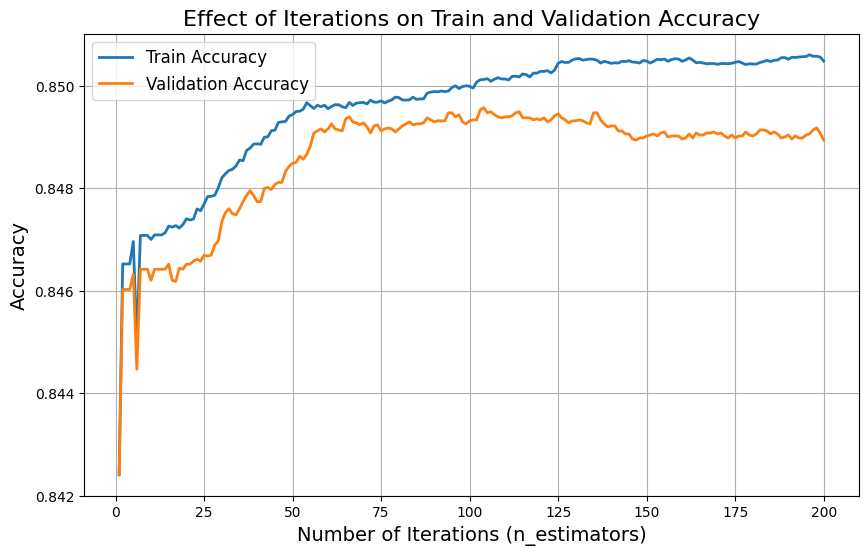

Best Parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 4}
Validation Accuracy: 0.8495742667928098


In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

dt_estimator = DecisionTreeClassifier(random_state=42)
ada = AdaBoostClassifier(estimator=dt_estimator, random_state=42)

param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1, 1.5, 2],
    'estimator__max_depth': [1, 2, 3, 4, 5],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5]
}

random_search_ada = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_distributions,
    n_iter=50,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_ada.fit(X_train, y_train)

best_ada_boost = random_search_ada.best_estimator_
y_pred_ada = best_ada_boost.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Best Parameters for AdaBoost:", random_search_ada.best_params_)
print("Test Accuracy for AdaBoost:", accuracy_ada)
print(classification_report(y_test, y_pred_ada))


best_ada_boost.fit(X_train, y_train)

train_accuracies = list(best_ada_boost.staged_score(X_train, y_train))
val_accuracies = list(best_ada_boost.staged_score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy", linewidth=2)
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", linewidth=2)
plt.xlabel("Number of Iterations (n_estimators)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Effect of Iterations on Train and Validation Accuracy", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

print("Best Parameters:", random_search_ada.best_params_)
print("Validation Accuracy:", max(val_accuracies))


In [79]:
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_samples_leaf=1),
    n_estimators=200, 
    learning_rate=0.1, 
    random_state=42
)

ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8489435509303059
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

This plot shows how the accuracy of the AdaBoost model changes as the number of estimators increases. At first, both training and validation accuracy improve quickly as the model learns from the data. After about 50 estimators, the validation accuracy levels off, meaning the model stops getting better on unseen data. Meanwhile, training accuracy keeps going up slightly, which shows the model is starting to overfit—getting too focused on the training data. Adding more estimators beyond 100 doesn’t help much and only adds more computational work without improving results.

The AdaBoost model achieved an overall accuracy of 84.9%, performing exceptionally well for the majority class (no diabetes) with an f1-score of 0.92, but it struggled significantly with the minority classes, yielding an f1-score of 0.00 for prediabetes and 0.27 for diabetes. This imbalance leads to a low macro average f1-score of 0.39, indicating that the model's predictions are heavily biased toward the majority class. The poor performance on smaller classes highlights the need to address data imbalance through techniques like oversampling, undersampling, or class weighting. Balancing the dataset or employing alternative ensemble methods could improve the model’s recall and f1-scores for the minority classes, ensuring better generalization across all classes.

Number of components explaining 95% variance: 33


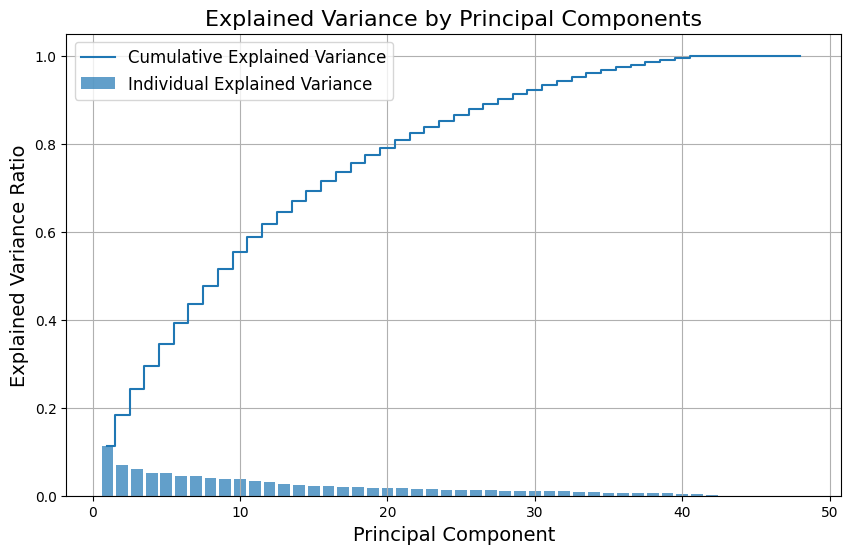

In [54]:
pca = PCA().fit(X_train)


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")


plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    alpha=0.7,
    align='center',
    label='Individual Explained Variance'
)
plt.step(
    np.arange(1, len(cumulative_variance) + 1),
    cumulative_variance,
    where='mid',
    label='Cumulative Explained Variance'
)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()

The graph shows the explained variance by each principal component and the cumulative variance as features are added. With 42 total features, we see that approximately 20 principal components are needed to capture around 80% of the variance in the data. This suggests that dimensionality can be significantly reduced while retaining most of the information.

In [55]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

columns = [f'PC{i+1}' for i in range(n_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=columns)
print(f"Transformed training dataset shape: {X_train_pca_df.shape}")
print(f"Transformed test dataset shape: {X_test_pca_df.shape}")

Transformed training dataset shape: (202944, 33)
Transformed test dataset shape: (50736, 33)


## ADA with PCA

In [87]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

ada_model_pca = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=4, 
        min_samples_split=5, 
        min_samples_leaf=1,
        random_state=42,
    ),
    algorithm='SAMME',
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

ada_model_pca.fit(X_train_pca, y_train, sample_weight=np.array([class_weight_dict[class_label] for class_label in y_train]))
y_pred_ada_pca = ada_model_pca.predict(X_test_pca)

accuracy_ada_pca = accuracy_score(y_test, y_pred_ada_pca)
print("AdaBoost with PCA Accuracy:", accuracy_ada_pca)
print(classification_report(y_test, y_pred_ada_pca))

AdaBoost with PCA Accuracy: 0.6035753705455692
              precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     42741
         1.0       0.03      0.29      0.05       926
         2.0       0.32      0.61      0.42      7069

    accuracy                           0.60     50736
   macro avg       0.43      0.50      0.40     50736
weighted avg       0.84      0.60      0.69     50736



The issue likely stems from the way AdaBoost interacts with both class weights and imbalanced data. AdaBoost works by focusing heavily on samples that are hard to classify, meaning it pays extra attention to misclassified examples in each iteration. When class weights are applied, it amplifies this focus on the minority classes, which are already hard to classify due to their limited representation. This can lead to the model overfitting on noisy or overlapping samples in the minority classes, reducing its ability to generalize effectively to new data.

Even with SMOTE, which generates synthetic samples to balance the classes, the improvement is minimal—only about 3%. This could be because SMOTE doesn’t always create truly representative samples; instead, it interpolates between existing minority class data points. If the original data for minority classes is noisy or not well-distributed, the synthetic samples may not help much. Furthermore, AdaBoost's iterative nature means it still tends to overfocus on areas of the feature space where the classes overlap, further limiting gains from SMOTE.

The root of the problem may also lie in the dataset's structure. If the features don’t provide enough discriminative power for the minority classes, no amount of weighting or resampling can fully address the imbalance. It’s a reminder that techniques like class weights or SMOTE can only go so far—if the data itself doesn’t contain enough information to separate the classes, the model will struggle no matter what adjustments are made. 

# Final remarks


In [85]:
models = {
    'Decision Tree': (tree_model, y_pred_tree),
    'Logistic Regression': (logistic_model, y_pred_logistic),
    'KNN': (knn_model, y_pred_knn),
    'Random Forest': (rf_model, y_pred_rf),
    'AdaBoost': (ada_model, y_pred_ada)
}

results = []

for model_name, (model, y_pred) in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': model_name, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results_df

,Model,Accuracy
0,AdaBoost,0.848944
1,Random Forest,0.848668
2,Logistic Regression,0.848076
3,Decision Tree,0.845908
4,KNN,0.821507



The final comparison of models shows that AdaBoost performed the best with an accuracy of 84.9%, followed closely by Random Forest (84.87%) and Logistic Regression (84.81%). However, given how close the results are and considering the simplicity and elegance of Logistic Regression, it could be argued as the best model overall. Logistic Regression is computationally efficient, easy to interpret, and robust, which makes it a highly practical choice, especially when more complex models like AdaBoost and Random Forest provide only marginal improvements. However, given the importance of accuracy, we would choose adaboost even though it is a way more complex model.

One key takeaway from these results is the lack of substantial improvement across models. Even with advanced techniques like SMOTE to handle class imbalance, the performance doesn’t go beyond 85%. Rather the opposite happens. The performance drops more than 15%. This suggests that the dataset itself may be inherently limited in its predictive capability. It’s possible that the features available, while helpful, don’t capture all the information necessary to achieve higher accuracy. Additionally, the relationships in the data appear to be largely linear, which explains why Logistic Regression performs so well despite its simplicity. More sophisticated models like AdaBoost and Random Forest likely fail to add significant value because of that.

From the feature importance analysis, we’ve learned that BMI, High Blood Pressure, and High Cholesterol are consistently the most important predictors for diabetes onset. This aligns with their known association with health conditions closely tied to diabetes. However, there are notable limitations when working with observational data. For example, socioeconomic factors like income or access to healthcare could act as confounding variables, influencing both health behaviors (e.g., diet and exercise) and diabetes outcomes, potentially creating relationships between predictors and the target variable that are not causal. While the dataset did include income groups, these were not nuanced enough to provide deeper insights—most income levels were grouped below $60,000, with a single large category for everything above $60,000. This lack of granularity likely diluted the predictive power of income as a variable. Additionally, many features, including general health indicators, were self-reported, which introduces bias and limits the expressiveness of these measures. Future work should focus on collecting more precise and nuanced socioeconomic data, as well as validated health metrics, to improve model performance. For instance, an RCT could explore the causal impact of interventions like reducing BMI through diet or exercise on diabetes onset while controlling for detailed income brackets or healthcare access. This would provide a more accurate understanding of these predictors' true importance and help separate correlation from causation.

The study's strengths lie in its systematic exploration of different models and preprocessing techniques, which provided valuable insights into the dataset and its constraints. However, the study is limited by the data itself—class imbalance, lack of experimental control, and potentially missing socioeconomic or behavioral features all limit the performance ceiling of the models. Future research should focus on collecting richer datasets that incorporate more granular information about lifestyle, socioeconomic status, and possibly genetic predispositions.

In conclusion, while AdaBoost, Random Forest and Logistic Regression stand out as effective models, the overall accuracy ceiling of 85% suggests that we’ve likely hit the limits of what this dataset can achieve. Further improvements will require more comprehensive data collection. As the best model is Ada Boost, we would choose it for applications since it is important to have a powerful model that could capture important relationships if data becomes more rich in the future. If we aim for simplicity, then Logistic regression is the best option.

In [ ]:
running_time_approx = 40  # in minutes